# Домашнее задание 2
## На курсе Анализ данных в Python (Социология)
### Темы: предобработка данных для модели, линейная регрессия, регуляризация, оптимизация гиперпараметров, классификация и логистическая регрессия, SGD

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Если вопрос задается конкретно, то предполагается, что вы дадите комментарии.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

 `Чтобы результаты при каждом запуске кода были одинаковые`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ


## **Простейший EDA и обработка признаков (4.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (1.65 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


In [3]:
# your code here
print(df_train.sample(10))
print('–––––––––––––––––––––––––––––––––––––')
print(df_test.head(), '\n')
print('–––––––––––––––––––––––––––––––––––––')
print(df_test.tail(), '\n')
print('–––––––––––––––––––––––––––––––––––––')
print('Колонки с пропусками в трейне:', ', '.join(list(df_train.isna().sum()[df_train.isna().sum()!=0].index)), '\n')
print('Колонки с пропусками в тесте:' , ', '.join(list(df_test.isna().sum()[df_test.isna().sum()!=0].index)), '\n')
print(f'Количество дубликатов: {df_test.duplicated().sum() + df_train.duplicated().sum()}')

                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [4]:
# из КОЛИЧЕСТВЕННЫХ показателей числовой признак, в котором ЕСТЬ пропуски, ТОЛЬКО признак seats

In [5]:
# закоменчен код, который на данном этапе преобразоывал переменные и заменял пропуски.
# в работе было принято решение удалить пропуски, так как они не оказывают существенное влияние на результаты модели


# предобработка данных и удаление проупсков для колонки mileage

# df_train['mileage'] = df_train.mileage.str.split().str[0]
# df_train.mileage = df_train.mileage.astype(float)
# m1 = df_train.mileage.median()

# df_test['mileage'] = df_test.mileage.str.split().str[0]
# df_test.mileage = df_test.mileage.astype(float)

# df_train.fillna({'mileage':m1}, inplace = True)
# df_test.fillna({'mileage':m1}, inplace = True)

# предобработка данных и удаление проупсков для колонки engine

# df_train['engine'] = df_train.engine.str.split().str[0]
# df_train.engine = df_train.engine.astype(float)
# m2 = df_train.engine.median()

# df_test['engine'] = df_test.engine.str.split().str[0]
# df_test.engine = df_test.engine.astype(float)


# df_train.fillna({'engine':m2}, inplace = True)
# df_test.fillna({'engine':m2}, inplace = True)

# предобработка данных и удаление проупсков для колонки max_power

# df_train['max_power'] = df_train.max_power.str.split().str[0]
# df_train['max_power'] = df_train['max_power'].replace(to_replace='bhp', value=0)


# df_train['max_power'] = df_train['max_power'].astype(float)
# m3 = df_train.max_power.median()

# df_test['max_power'] = df_test.max_power.str.split().str[0]
# df_test.max_power = df_test.max_power.astype(float)

# df_train.fillna({'max_power':m3}, inplace = True)
# df_test.fillna({'max_power':m3}, inplace = True)

# ------------------------------------------------------

# предобработка данных и удаление пропусков для колонки seats

m5 = df_train.seats.median()


df_train.fillna({'seats':m5}, inplace = True)
df_test.fillna({'seats':m5}, inplace = True)








In [6]:
print(f'Количество пропусков на тесте и на трейне ТОЛЬКО на КОЛОНКЕ seats: {df_train["seats"].isna().sum() + df_test["seats"].isna().sum()}')

Количество пропусков на тесте и на трейне ТОЛЬКО на КОЛОНКЕ seats: 0


### **Задание 2 (1.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [7]:
# your code here

df_train1 = df_train.loc[:, df_train.columns != 'selling_price'] # запишем все колонки, кроме таргета
print(df_train1[df_train1.duplicated()].shape[0]) # выведем сколько у нас дубликатов
print(df_train1[df_train1.duplicated()].head()) # выведем 5 первых  дубликатов

indexes_to_drop = df_train1.index[df_train1.duplicated()] # найдем индексы теъ строк дубликатов, кооторые нужно выкинуть

1159
                                         name  year  km_driven    fuel  \
254                  Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                          Maruti Swift VXI  2012      50000  Petrol   
268                    Maruti Swift Dzire VXI  2014      70000  Petrol   
324  Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                             Lexus ES 300h  2019      20000  Petrol   

    seller_type transmission         owner     mileage   engine   max_power  \
254  Individual       Manual   First Owner   18.9 kmpl  1197 CC      82 bhp   
258  Individual       Manual  Second Owner   18.6 kmpl  1197 CC    85.8 bhp   
268  Individual       Manual  Second Owner   19.1 kmpl  1197 CC    85.8 bhp   
324      Dealer    Automatic   First Owner   13.6 kmpl  1999 CC     177 bhp   
325      Dealer    Automatic   First Owner  22.37 kmpl  2487 CC  214.56 bhp   

                  torque  seats  
254       114Nm@ 4000rpm    5.0  
258    

In [8]:
# одинаковое признаковое описание при разных ценах есть у двух посследних наблюдений + наблюдении 4480

# цена и описание автомобиля Tata Indigo CR4 совпадают для годов 2013 и с пробегом 25000
df_train1[(df_train1.name == 'Tata Indigo CR4') & (df_train1.year == 2013) & (df_train1.km_driven == 25000)]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4480,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [9]:
df_train = df_train.drop(index = indexes_to_drop) # выкидываем дубликаты
df_train.reset_index(drop= True , inplace= True ) # меняем индексы, чтобы все было по порядку

In [10]:
# с машиной Tata Indigo CR4 все ок
df_train[(df_train.name == 'Tata Indigo CR4') & (df_train.year == 2013) & (df_train.km_driven == 25000)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3808,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [11]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.75 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [12]:
# убираем единицы и правращаем  нужные колонки в нужные типы

# колонка mileage
df_train['mileage'] = df_train.mileage.str.split().str[0]
df_train.mileage = df_train.mileage.astype(float)
df_test['mileage'] = df_test.mileage.str.split().str[0]
df_test.mileage = df_test.mileage.astype(float)

# колонка engine
df_train['engine'] = df_train.engine.str.split().str[0]
df_train.engine = df_train.engine.astype(float)
df_test['engine'] = df_test.engine.str.split().str[0]
df_test.engine = df_test.engine.astype(float)

# колонка max_power
df_train['max_power'] = df_train.max_power.str.split().str[0]
df_train['max_power'] = df_train['max_power'].replace(to_replace='bhp', value=0)
df_train.max_power = df_train.max_power.astype(float)

df_test['max_power'] = df_test.max_power.str.split().str[0]
df_test.max_power = df_test.max_power.astype(float)


df_train[["mileage", "engine", "max_power"]].head()

#  удаляем колонку torque
del df_train['torque']
del df_test['torque']



In [13]:
print('Проверим типы данных на трейне')
print(df_train.dtypes, '\n\n')
print('Проверим типы данных на тесте')
print(df_test.dtypes)

Проверим типы данных на трейне
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object 


Проверим типы данных на тесте
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object


### **Задание 4 (0.3 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [14]:
# все приводим к инту

df_train.engine = df_train.engine.astype(int, errors='ignore')
df_train.seats = df_train.seats.astype(int, errors='ignore')

### **Задание 5 (0.3 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [15]:
# your code here
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5654.000000,5654.000000,5657.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.432842,1435.418111,88.087496,5.426712
std,4.095622,5.354320e+05,6.007114e+04,4.051002,492.453262,32.150448,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.800000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [16]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000,981.000000,981.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.338206,1458.882773,91.015627,5.403000
std,4.012149,7.585539e+05,48486.218662,3.989872,526.228560,35.207383,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.000000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.500000,1197.000000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.000000,83.100000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.000000,280.000000,9.000000


In [17]:
df_train.describe(include=['object']) # описательные статистики только по кат переменным

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [18]:
df_test.describe(include=['object']) # описательные статистики только по кат переменным

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [19]:
# Проверка того, что все сделали правильно - так как мы удалили признак torque, значит размерноость должна поменяться (вместо 13, 12)

# assert df_train.shape == (5840, 13), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'
assert df_train.shape == (5840, 12), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

## **Визуализации (3 балла)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (1.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

# ОТВЕТ

`Про связь таргета с перенными`

- У цены продажи НЕТ выраженной связь почти со вссеми перенными.
- Линейная зависимость у таргета есть с максимальной мощностью машины (max_power) и с мощносттью двигателя (engine) - чем больше мощность машины или дивгателя (в меньше степени), тем выше цена
- Скорее всего цена слабо связана с экономичностью топлива (mileage) - чем выше цена, тем ниже экономичность

`Про связь переменных между собой`
- есть связь между экономичностью топлива и мощностью двигателя (чем выше мощность, тем ниже экономичность)
- аналогично связь есть между экономичностью топлива и максимальной мощностью машины (чем выше мощность, тем ниже экономичность)

`Похожими ли оказались совокупности при разделении на трейн и тест?`

Да, распределения по переменным практически идентичны


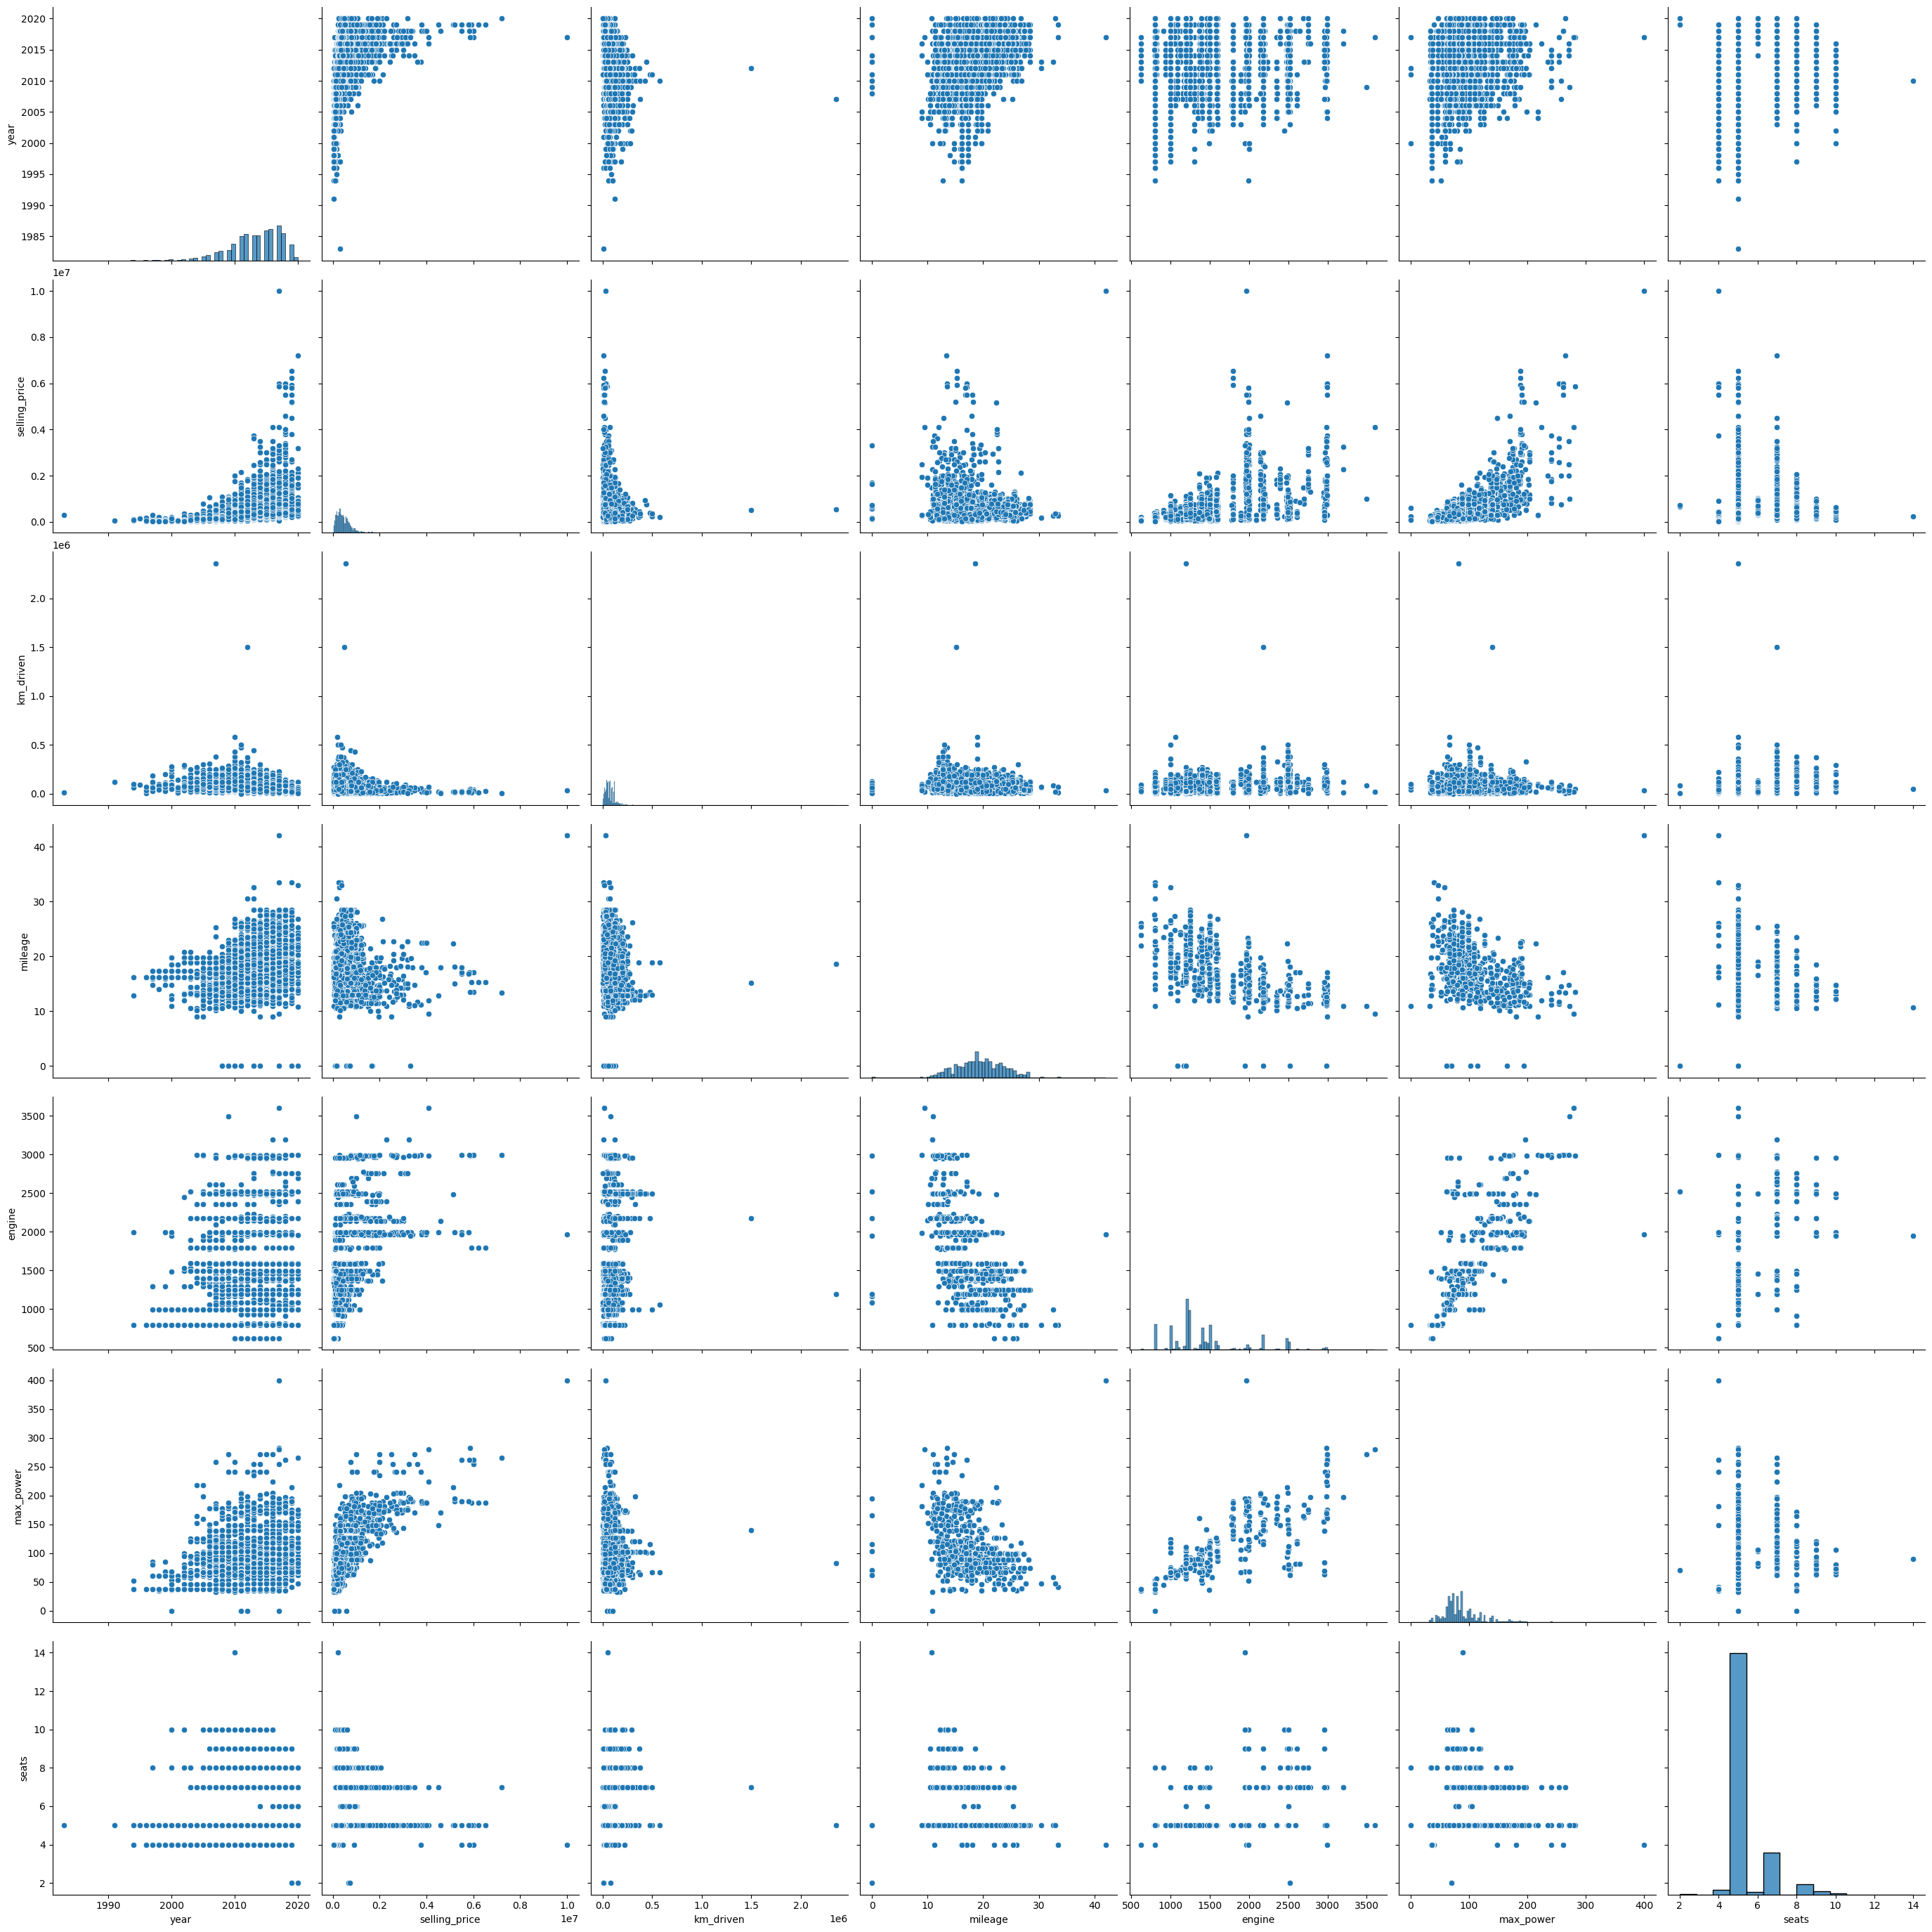

In [20]:
# your code here
sns.pairplot(df_train._get_numeric_data(), height = 4
             )

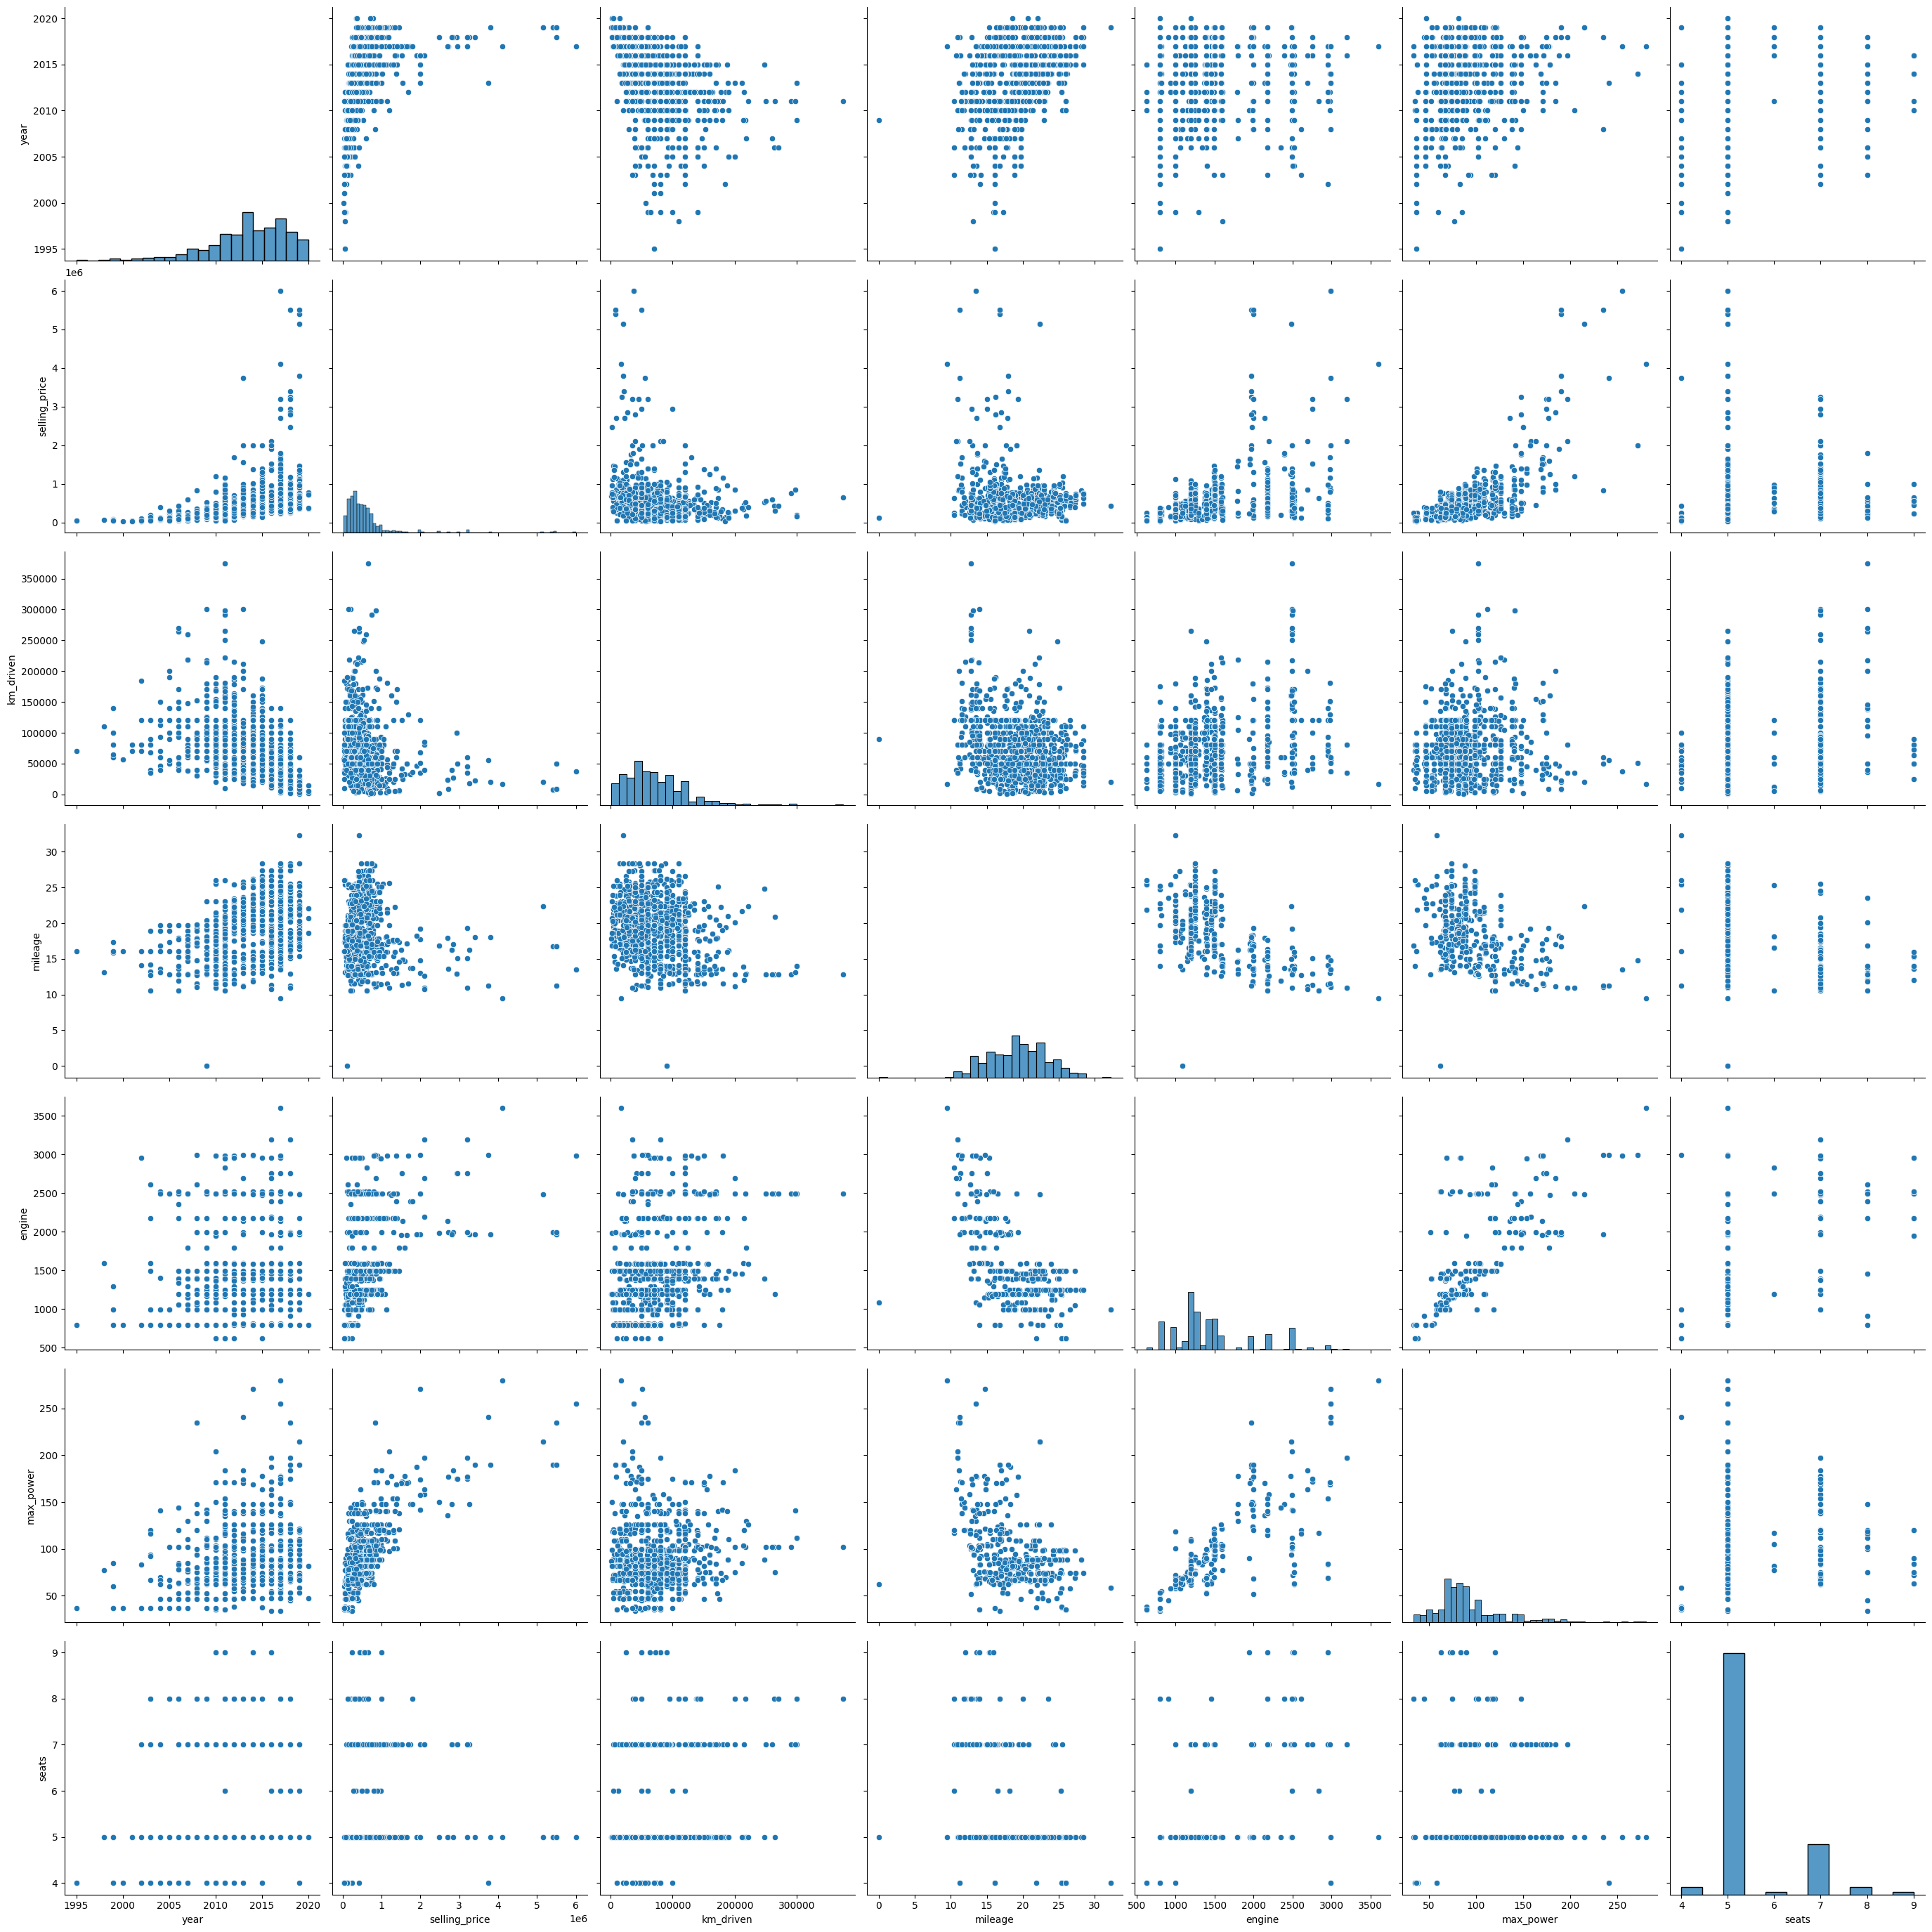

In [21]:
sns.pairplot(df_test._get_numeric_data(), height = 4
             )

### **Задание 7 (1.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [22]:
# для колич признаков строим матрицу
df_train._get_numeric_data().corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.363360,-0.016790,0.158795,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.105939,0.445615,0.695494,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.183538,0.235914,0.026445,0.192328
mileage,0.363360,-0.105939,-0.183538,1.000000,-0.574404,-0.373278,-0.452687
engine,-0.016790,0.445615,0.235914,-0.574404,1.000000,0.681714,0.650345
max_power,0.158795,0.695494,0.026445,-0.373278,0.681714,1.000000,0.240992
seats,0.041178,0.149953,0.192328,-0.452687,0.650345,0.240992,1.000000


<Axes: >

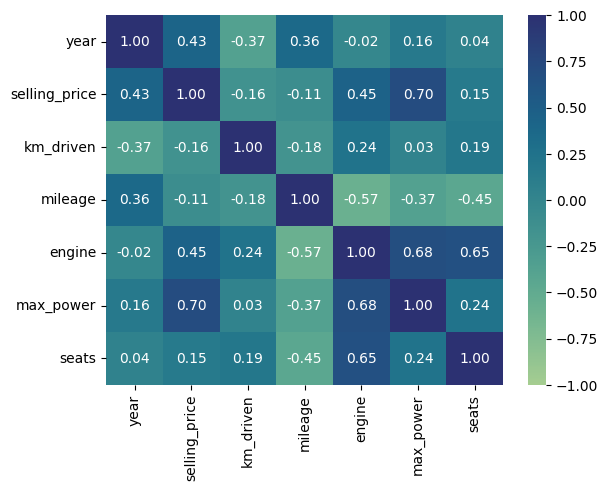

In [23]:
sns.heatmap(df_train._get_numeric_data().corr(),
            annot = True, # надписи на квадратиках
            fmt=".2f" , # два знака после запятй
            cmap="crest", # цвет
            vmin=-1, # макс и мин значения (корреляция принимает значения от -1 до 1)
            vmax=1)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

# ОТВЕТ

1. По модулю наименьшая корреляция у max power (максимальная мощность) и km_driven (пробег) = 0,02
2. Как и предполагалось,  сильная положительная линейная зависимость наблюдается между ценой и макисмальной мощностью двигателя (0,69), между мощностью двигателя и максимальной мощностью (0,68), а также между кол-вом сидей и мощностью двигателя (0,65)
3. В целом так можно сказать, однако важно отметить, что корреляция не дает понимания каузальности (нельзя сказать, что год влияет на кол-во километров), а можно сказать, что связь между этими признаками есть и она отрицательная линейя средняя

# **Часть 2 | Модель только на вещественных признаках (6.25 балла)**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.25 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [24]:
# создадим датасеты БЕЗ ПРОПУСКОВ
df_train_clean = df_train.dropna().reset_index(drop=True)
df_test_clean = df_test.dropna().reset_index(drop=True)

In [25]:
# ячейка ИСССКЛЮЧИТЕЛЬНОО ДЛЯ ассерта (в старом датасете сохраняем трагет и чиловые переменные)
y_train = df_train['selling_price']
X_train = df_train._get_numeric_data().drop(columns = ['selling_price'], axis = 1)

In [26]:
assert X_train.shape == (5840, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'


In [27]:
# перезаписываем переменные. Теперь работает с датасетом БЕЗ ПРОПУСКОВ
y_train = df_train_clean['selling_price']
X_train = df_train_clean._get_numeric_data().drop(columns = ['selling_price'], axis = 1)

In [28]:
y_train.shape

(5654,)

In [29]:
# проверка после очистки от пропусков
assert X_train.shape == (5654, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

In [30]:
# аналогично для теста
y_test = df_test['selling_price']
X_test = df_test._get_numeric_data().drop(columns = ['selling_price'], axis = 1)

In [31]:
assert X_test.shape == (1000, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

In [32]:
# будем работать с очищенными данными
y_test = df_test_clean['selling_price']
X_test = df_test_clean._get_numeric_data().drop(columns = ['selling_price'], axis = 1)

In [33]:
# проверка после очистки от пропусков
assert X_test.shape == (981, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

In [34]:
# кол-во пропусков
X_test.isna().sum().sum() + X_train.isna().sum().sum()

0

### **Задание 9 (1 балл)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

Аргументация заполнения пропусков во всем датасете:

1. Без заполнения пропусков, НЕЛЬЗЯ построить линейную ригрессию

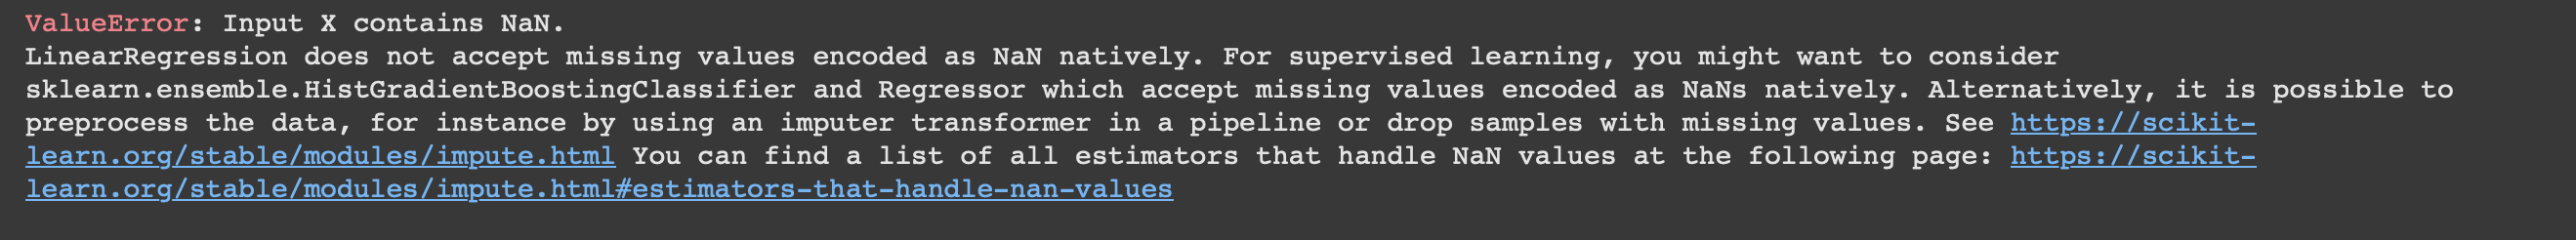


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X=X_train, y= y_train)

LinearRegression()

In [36]:
print(f'R-square train: {r2_score(y_train, lr.predict(X_train))}')
print(f'R-square test: {r2_score(y_test, lr.predict(X_test))}')
print(f'MSE train: {MSE(y_train, lr.predict(X_train))}')
print(f'MSE test: {MSE(y_test, lr.predict(X_test))}')

R-square train: 0.5914269909447032
R-square test: 0.5919546910159489
MSE train: 118939895543.40573
MSE test: 237543638816.53503


# ВЫВОД

1. Включенные в модель переменные на тесте и на трейне объясняют окло 59% разброоса таргета (цены)
2. Среднеквадратическая ошибка на трейне 118939895543.40573 - значение довольно большое, поэтому можно сказать, что модель пока не очень хороошоо предсказывает цену
3. Среднеквадратическая ошибка на тесте 237543638816.53503– значение выше, чем на трейне, однакоо нельзя 100% сказаять, что модель переобучилась. На тесте модель еще хуже предсказывает цену

### **Задание 10 (0.75 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [37]:
from sklearn.preprocessing import StandardScaler

# your code here
sc = StandardScaler() # создаем скалер
ft_sc = sc.fit_transform(X_train) # масштабируем трейн
X_train_sc = pd.DataFrame(data = ft_sc, columns = X_train.columns)

# X_train_sc.head(2)

ft_sc_tst = sc.fit_transform(X_test) # масштабируем тест
X_test_sc = pd.DataFrame(data = ft_sc_tst, columns = X_train.columns)
X_test_sc.shape

(981, 6)

In [38]:
lr.fit(X=X_train_sc, y= y_train) # обучаем лин рег это отскаленых данныз

LinearRegression()

In [39]:
print(f'R-square train after scaling: {r2_score(y_train, lr.predict(X_train_sc))}')
print(f'R-square test after scaling: {r2_score(y_test, lr.predict(X_test_sc))}')
print(f'MSE train after scaling: {MSE(y_train, lr.predict(X_train_sc))}')
print(f'MSE test after scaling: {MSE(y_test, lr.predict(X_test_sc))}')

R-square train after scaling: 0.591426990944703
R-square test after scaling: 0.5648558307587007
MSE train after scaling: 118939895543.40578
MSE test after scaling: 253319244445.51462


#ВЫВОД

1. После стандартизации признаков, R-square немного увеличился (на 0,007) - очень не существенный прирост
2. Ошибка практичеси не изменилась – модель все также плохо предсказывает таргет

### **Задание 11 (0.5 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [40]:
print(f'Наиболее информативынй признак: {X_train.columns[lr.coef_ == max(abs(lr.coef_))][0]}')

Наиболее информативынй признак: max_power


### **Задание 12 (1.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [41]:
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(X_train_sc, y_train) # нормализированные признаки

print(f'R-square train after scaling with regularization L1: {r2_score(y_train, ls.predict(X_train_sc))}')
print(f'R-square test after scaling with regularization L1: {r2_score(y_test, ls.predict(X_test_sc))}')
print(f'MSE train after scaling with regularization L1: {MSE(y_train, ls.predict(X_train_sc))}')
print(f'MSE test after scaling with regularization L1: {MSE(y_test, ls.predict(X_test_sc))}')

# your code here

R-square train after scaling with regularization L1: 0.5914269909099281
R-square test after scaling with regularization L1: 0.564854574945539
MSE train after scaling with regularization L1: 118939895553.5291
MSE test after scaling with regularization L1: 253319975517.3381


# ОТВЕТ
Качетсво почти не изменилось:( R-square на уровне 60%, ошибка аналогично.

In [42]:
# прооверим значения коэффов
ls.coef_

array([151132.4508687 , -42405.08374191,  26302.50092754,  60012.47157127,
       327325.36809003, -23181.48480799])

# ОТВЕТ

Занулений нет, так как регуляризация штрафует только за веса на порядок больше (что является сивдетельством переобучения). Сюдя по весами у нас нет координальный отличий между коэффициентами => нечего штрафовать => нет нулей

### **Задание 13 Финальный рывок (2.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [43]:
from sklearn.model_selection import GridSearchCV

# your code here
params = {'alpha':np.arange(1139, 2000)} # параметры перебора
n_folds = 10 # колво фолдов

grd_srch = GridSearchCV(estimator = Lasso(),
                           param_grid = params,
                           scoring = {'MSE': 'neg_mean_squared_error', 'R-square': 'r2'}, # записываем метрики
                           refit = "MSE", # так как их две, записываем по какой будет фититься
                           cv = n_folds
                           )

grd_srch.fit(X_train_sc,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149,
       1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160,
       1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171,
       1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182,
       1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193,
       1194, 1195, 1...
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999])},
             refit='MSE',
             scoring={'MSE': 'neg_mean_squared_error', 'R-square': 'r2'})

In [44]:
print(f'GridSearch пришлось обучать {len(params["alpha"])} моделей')
print(f'Лучшие параметры  модели по MSE это – {grd_srch.best_estimator_} с ошибкой  {grd_srch.best_score_}')

GridSearch пришлось обучать 861 моделей
Лучшие параметры  модели по MSE это – Lasso(alpha=1250) с ошибкой  -123568160226.11926


In [45]:
ls1 = grd_srch.best_estimator_
ls1.fit(X_train_sc, y_train) # обучим модель с лучшими параметрами

Lasso(alpha=1250)

In [46]:
print('Занулений нет. Все коэффициенты !=0\n', ls1.coef_)

Занулений нет. Все коэффициенты !=0
 [150899.67289433 -40995.91210871  23997.93720594  54054.18215225
 328425.56604822 -19641.0172439 ]


In [47]:
print(f'R-square train after scaling with regularization L1 with par = {grd_srch.best_estimator_.alpha}: {r2_score(y_train, ls1.predict(X_train_sc))}')
print(f'R-square test after scaling with regularization L1 with par = {grd_srch.best_estimator_.alpha}: {r2_score(y_test, ls1.predict(X_test_sc))}')
print(f'MSE train after scaling with regularization L1 with par = {grd_srch.best_estimator_.alpha}: {MSE(y_train, ls1.predict(X_train_sc))}')
print(f'MSE test after scaling with regularization L1 with par = {grd_srch.best_estimator_.alpha}: {MSE(y_test, ls1.predict(X_test_sc))}')

R-square train after scaling with regularization L1 with par = 1250: 0.5913740833746826
R-square test after scaling with regularization L1 with par = 1250: 0.5632650954089522
MSE train after scaling with regularization L1 with par = 1250: 118955297492.90372
MSE test after scaling with regularization L1 with par = 1250: 254245291271.8197


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [48]:
from sklearn.linear_model import ElasticNet


# your code here
# params = {'alpha':np.arange(1, 100)}

params = {'alpha':np.arange(0, 2, 0.01)} # методом проб и ошибок вышла на такие значения (более маленькие)
n_folds = 10
grd_srch_e = GridSearchCV(estimator = ElasticNet(),
                           param_grid = params,
                           scoring = {'MSE': 'neg_mean_squared_error', 'R-square': 'r2'},
                           refit = "MSE",
                           cv = n_folds
                           )

grd_srch_e.fit(X_train_sc,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.508e+14, tolerance: 1.225e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.5...
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53,
       1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64,
       1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75,
       1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86,
       1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97,
       1.98, 1.99])},
             refit='MSE',
             scoring={'MSE': 'neg_mean_squared_error', 'R-square': 'r2'})

In [49]:
print(f'GridSearch пришлось обучать {len(params["alpha"])} моделей')
print(f'По MSE лучшие параметры это – {grd_srch_e.best_estimator_} с ошибкой {grd_srch_e.best_score_}')

GridSearch пришлось обучать 200 моделей
По MSE лучшие параметры это – ElasticNet(alpha=0.03) с ошибкой -123545963414.07755


In [50]:
lsEN1 = grd_srch_e.best_estimator_
lsEN1.fit(X_train_sc, y_train)

ElasticNet(alpha=0.03)

In [51]:
print(f'R-square train after scaling with regularization L1 with par = {grd_srch_e.best_estimator_.alpha}: {r2_score(y_train, lsEN1.predict(X_train_sc))}')
print(f'R-square test after scaling with regularization L1 with par = {grd_srch_e.best_estimator_.alpha}: {r2_score(y_test, lsEN1.predict(X_test_sc))}')
print(f'MSE train after scaling with regularization L1 with par = {grd_srch_e.best_estimator_.alpha}: {MSE(y_train, lsEN1.predict(X_train_sc))}')
print(f'MSE test after scaling with regularization L1 with par = {grd_srch_e.best_estimator_.alpha}: {MSE(y_test, lsEN1.predict(X_test_sc))}')

R-square train after scaling with regularization L1 with par = 0.03: 0.5913069219762002
R-square test after scaling with regularization L1 with par = 0.03: 0.561555984362134
MSE train after scaling with regularization L1 with par = 0.03: 118974848881.62248
MSE test after scaling with regularization L1 with par = 0.03: 255240250528.21585


# **Часть 3| Добавляем категориальные фичи (3.75 балла)**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.5 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
1. Удалить столбец`name`
2. Снова объединить категориальные с вещественными признаками.

In [52]:
# удаляем колонки
del df_train_clean['name']
del df_test_clean['name']

In [53]:
# из датасета БЕЗ пропусков достаем кат фичи

# колонки, которые являются катами
col_cut = list((set(df_train_clean.columns ) - set(df_train._get_numeric_data().columns)) | {'seats'})
y_train = df_train_clean['selling_price'] #перезапишем таргет

#создадим датасет только с кат фичами
X_train_ct = df_train_clean.drop(columns = ['selling_price'], axis = 1)[col_cut]

In [54]:
y_test = df_test_clean['selling_price']#перезапишем таргет
#создадим датасет только с кат фичами на тесте
X_test_ct = df_test_clean.drop(columns = ['selling_price'], axis = 1)[col_cut]

In [55]:
# соединим нормалищзированные данные X_train_sc (кроме колонки seats), и кат фичи
X_train_dum = pd.concat([X_train_sc.drop(columns = ['seats']), X_train_ct], axis=1)
X_test_dum = pd.concat([X_test_sc.drop(columns = ['seats']), X_test_ct], axis=1)

### **Задание 15 (2 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [56]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas


encoder = OneHotEncoder(drop='first') # будем выкидывать первое вхожднение
encoder.fit(X_train_dum[col_cut]) # обучаемся только на кат фичах

# your code here

OneHotEncoder(drop='first')

In [57]:
cd = encoder.transform(X_train_dum[col_cut]).toarray() # перекодируем кат фичи
cut_names = encoder.get_feature_names_out(col_cut) # достаем имена всех фичей
df_dummies_train = pd.DataFrame(cd, columns=cut_names).astype(int) # создаем датасет со всеми перекодированными фичами

# аналогично для теста
cd_test = encoder.transform(X_test_dum[col_cut]).toarray()
cut_names = encoder.get_feature_names_out(col_cut)
df_dummies_test = pd.DataFrame(cd_test, columns=cut_names).astype(int)

In [58]:
# создаем датасеты с нормализированными данными + фиктивными переменными
X_train = pd.concat([X_train_sc.drop('seats', axis=1), df_dummies_train], axis=1)
X_test = pd.concat([X_test_sc.drop('seats', axis=1), df_dummies_test], axis=1)

In [59]:
X_train

,year,km_driven,mileage,engine,max_power,seats_4,seats_5,seats_6,seats_7,seats_8,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.094482,1.191768,0.979389,-0.380614,-0.440428,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,0.094482,0.770384,0.421453,0.127093,0.479427,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,-0.930858,0.886058,0.880640,-0.080051,0.058138,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,-1.699863,0.770384,-0.822793,-0.279073,0.002049,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,0.863487,-0.468980,0.174579,-0.484186,-0.195508,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,-1.443528,1.943650,-0.373482,-0.709608,-0.811237,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
5650,-0.161853,-0.386356,-0.131545,-0.888321,-0.655435,0,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
5651,-0.161853,0.605136,-0.230295,-0.484186,-0.164659,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
5652,-1.699863,0.753860,-0.649981,0.116939,0.681346,0,1,0,0,0,...,1,0,0,1,0,1,1,0,0,0


### **Задание 16 (1.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


# your code here

In [61]:

# your code here
params = {'alpha':np.arange(0, 1, 0.01)} # перебор параметров
n_folds = 10
rdg = GridSearchCV(estimator = Ridge(),
                           param_grid = params,
                           scoring = {'MSE': 'neg_mean_squared_error', 'R-square': 'r2'},
                           refit = "MSE",
                           cv = n_folds
                           )

rdg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             refit='MSE',
             scoring={'MSE': 'neg_mean_squared_error', 'R-square': 'r2'})

In [62]:
print(f'GridSearch пришлось обучать {len(params["alpha"])} моделей')
print(f'По MSE лучшие параметры это – {rdg.best_estimator_} с ошибкой {rdg.best_score_}')

GridSearch пришлось обучать 100 моделей
По MSE лучшие параметры это – Ridge(alpha=0.99) с ошибкой -109586214825.75331


In [63]:
rdg_gr = rdg.best_estimator_
rdg_gr.fit(X_train, y_train)


Ridge(alpha=0.99)

In [64]:
print(f'R-square train with regularization L2 with best par = {rdg.best_estimator_}: {r2_score(y_train, rdg_gr.predict(X_train))}')
print(f'R-square test with regularization L2 with best par = {rdg.best_estimator_}: {r2_score(y_test, rdg_gr.predict(X_test))}')
print(f'MSE train with regularization L2 with best par = {rdg.best_estimator_}: {MSE(y_train, rdg_gr.predict(X_train))}')
print(f'MSE test with regularization L2 with best par = {rdg.best_estimator_}: {MSE(y_test, rdg_gr.predict(X_test))}')

R-square train with regularization L2 with best par = Ridge(alpha=0.99): 0.66625582110165
R-square test with regularization L2 with best par = Ridge(alpha=0.99): 0.6092391438293743
MSE train with regularization L2 with best par = Ridge(alpha=0.99): 97156436907.50266
MSE test with regularization L2 with best par = Ridge(alpha=0.99): 227481491976.82166


# ОТВЕТ

Качество прогноза улучшилось - на тесте r-square стал 63%,на рейне почти 67% + уменьшилась ошибка

# **Часть 4 (7 баллов) | Классификация**



In [65]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [66]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### **Задание 13 (2 балла)**
Обучите логистическую регрессию на синтетических данных.

In [67]:
# your code here
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression() # создаем ло рег

lg.fit(X_train, y_train)

LogisticRegression()

На тестовой части посчитайте ROC-AUC, PR-AUC. Самостоятельно изучите, что такое PR-AUC.

Постройте ROC и PR кривые. Проинтерпретируйте результат.

In [68]:
# your code here

from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, auc
#трейн
lg_prob_tr = lg.predict_proba(X_train)[:, -1] # перем положительный класс
lg_roc_auc_tr = roc_auc_score(y_train, lg_prob_tr) # считаем roc-auc
pr_tr, rc_tr, _ = precision_recall_curve(y_train, lg_prob_tr) # считаем точность и полноту
auc_score_tr = auc(rc_tr, pr_tr) # считаем auc

#аналогично для теста
#тест
lg_prob = lg.predict_proba(X_test)[:, -1]
lg_roc_auc = roc_auc_score(y_test, lg_prob)
precision, recall, _ = precision_recall_curve(y_test, lg_prob)
auc_score = auc(recall, precision)

In [69]:
print('Трейновые метрики')
print(f' ROC-AUC = {lg_roc_auc_tr}')
print(f' PR-AUC = {auc_score_tr}\n')

print('Тестовые метрики')
print(f' ROC-AUC = {lg_roc_auc}')
print(f' PR-AUC = {auc_score}')

Трейновые метрики
 ROC-AUC = 0.9257775226513085
 PR-AUC = 0.9240658881450556

Тестовые метрики
 ROC-AUC = 0.9259023377910034
 PR-AUC = 0.9249724769284384


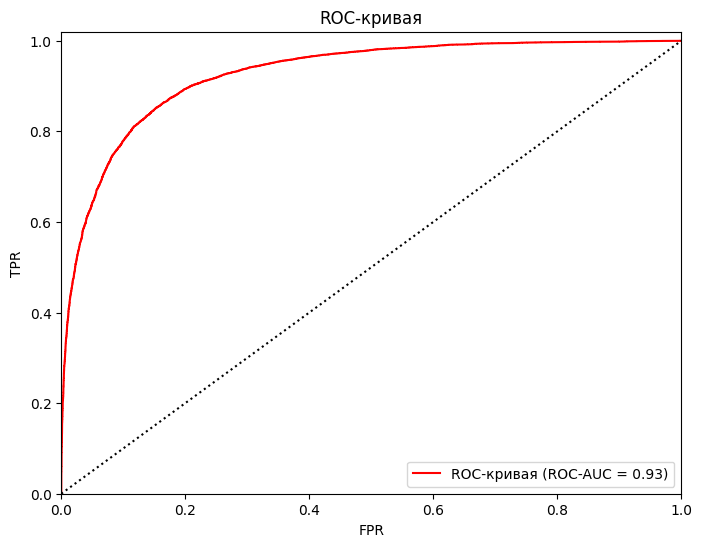

In [70]:
false_pos_r, true_pos_r, _ = roc_curve(y_test, lg_prob) # считаем рок кривую

plt.figure(figsize=(8, 6))
plt.plot(false_pos_r, true_pos_r,
         color='red',
         label=f'ROC-кривая (ROC-AUC = {round(lg_roc_auc, 2)})')
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted') # задаем биссектрису

plt.xlabel('FPR') # называем оси и делаем их от 0 до 1 (или до 1.02, чтобы график лучше смотрелся)
plt.xlim([0, 1])
plt.ylabel('TPR')
plt.ylim([0, 1.02])

plt.title('ROC-кривая')
plt.legend()
plt.show()

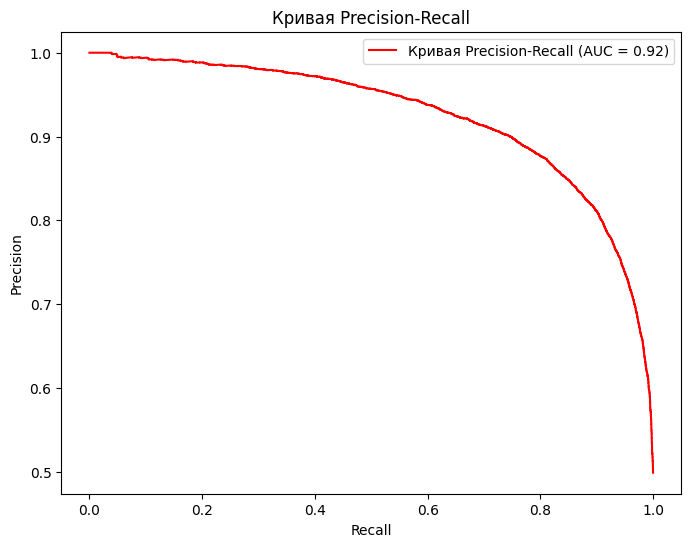

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision,
         color='red',
         label=f'Кривая Precision-Recall (AUC = {round(auc_score, 2)})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.legend()
plt.show()

# ИНТЕПРЕТАЦИЯ

- **ROC-AUC** - площадь под кривой стремится к 1 (= 0,93) => качество модели очень хорошее. Она почти всегда правильно классифицирует объекты (т е большинство объектов класса 1 попадают в класс 1, и большинство объектов класса 0 попдают в класс 0)
- **PR-AUC** - значение соотношения точности и полноты высокое (= 0,93) + площадь под кривой также большая => модель отлично относит объекты класса 1 (т е большинство объектов класса 1 попадают в класс 1)

### **Задание 14 (2 балла)**

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет.

In [72]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('train.csv', index_col=0)
data = data.replace(-1, np.nan) # по условию -1 это пропуски, поэтому перепишем их на пропуски
data = data.dropna() # удалим все пропуски
target = data.target.values
data = data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=111) #124

In [73]:
X_test['ps_ind_05_cat'].unique()

array([0., 5., 6., 3., 4., 1., 2.])

Посчитайте качество (выведите все метрики классификации) на train и test при применении логистической регрессии.

In [74]:
# your code here
from sklearn.linear_model import LogisticRegression

lg_1 = LogisticRegression()
lg_1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, precision_recall_curve, auc


# посчитаем точность,  ROC-AUC, PR-AUC
#трейн
y_train_pred = lg_1.predict(X_train)
acc_tr = accuracy_score(y_train, y_train_pred)
# prec_tr = precision_score(y_train, y_train_pred)
# recall_tr = recall_score(y_train, y_train_pred)


lg_prob_tr = lg_1.predict_proba(X_train)[:, -1]
lg_roc_auc_tr = roc_auc_score(y_train, lg_prob_tr)
pr_tr, rc_tr, _ = precision_recall_curve(y_train, lg_prob_tr)
auc_score_tr = auc(rc_tr, pr_tr)


#тест
y_test_pred = lg_1.predict(X_test)
acc_ts = accuracy_score(y_test, y_test_pred)
# prec_ts = precision_score(y_test, y_test_pred, zero_division = np.nan)
# recall_ts = recall_score(y_test, y_test_pred)

lg_prob = lg_1.predict_proba(X_test)[:, -1]
lg_roc_auc = roc_auc_score(y_test, lg_prob)
pr_ts, rc_ts, _ = precision_recall_curve(y_test, lg_prob)
auc_score = auc(rc_ts, pr_ts)

In [76]:
print('Трейновые метрики')
print(f' Accuracy = {acc_tr}')
# print(f' Precision = {prec_tr}')
# print(f' Recall = {recall_tr}')
print(f' ROC-AUC = {lg_roc_auc_tr}')
print(f' PR-AUC = {auc_score_tr}\n')

print('Тестовые метрики')
print(f' Accuracy = {acc_ts}')
# print(f' Precision = {prec_ts}')
# print(f' Recall = {recall_ts}')
print(f' ROC-AUC = {lg_roc_auc}')
print(f' PR-AUC = {auc_score}')

Трейновые метрики
 Accuracy = 0.9545832149181296
 ROC-AUC = 0.6106167881879501
 PR-AUC = 0.07118476509367355

Тестовые метрики
 Accuracy = 0.9538300104931794
 ROC-AUC = 0.5913395158960341
 PR-AUC = 0.0677856577975385


### **Задание 15 (2 балла)**

Закодируйте все категориальные признаки с помощью one-hot-кодирования, а числовые признаки масштабируйте. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до предобработки). Измерьте время, потребовавшееся на обучение модели. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [77]:
# категориальные переменные
cols_cut = X_train.columns[X_train.columns.str.endswith('cat')] #  те, которые заканчиваются на cat
X_train_cut = X_train[cols_cut]
X_test_cut = X_test[cols_cut]

In [78]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train_cut)

codes = encoder.transform(X_train_cut).toarray()
feature_names = encoder.get_feature_names_out(cols_cut)
df_dummies_train = pd.DataFrame(codes, columns=feature_names).astype(int)

codes_test = encoder.transform(X_test_cut).toarray()
feature_names = encoder.get_feature_names_out(cols_cut)
df_dummies_test = pd.DataFrame(codes_test, columns=feature_names).astype(int)

In [79]:
# интервальные и порядковые переменные
from sklearn.preprocessing import StandardScaler
X_train_num = X_train.drop(X_train.columns[X_train.columns.str.endswith('bin')|
                             X_train.columns.str.endswith('cat')],
             axis =1) # те, которые НЕ заканчиваются на cat или bin

sc = StandardScaler()
ft_sc = sc.fit_transform(X_train_num)
X_train_sc = pd.DataFrame(data = ft_sc, columns = X_train_num.columns)


X_test_num = X_test.drop(X_test.columns[X_test.columns.str.endswith('bin')|
                             X_test.columns.str.endswith('cat')],
             axis =1)

ft_sc_tst = sc.fit_transform(X_test_num)
X_test_sc = pd.DataFrame(data = ft_sc_tst, columns = X_train_num.columns)
X_test_sc.head(2)

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,-0.494035,-1.056846,-0.180577,0.963227,0.837638,-0.761978,-1.244476,-0.597387,-1.129893,-0.660115,...,-0.778774,-0.523549,-1.414368,-0.155885,-0.260706,0.206774,-1.045731,-1.1901,0.079134,-1.668422
1,-0.972142,1.128012,-0.180577,-0.453954,0.837638,-0.331706,-0.180664,0.719190,0.054894,0.060940,...,0.110054,-0.523549,-0.008574,-0.155885,2.156021,-0.481180,0.245224,-1.1901,-1.102302,-0.937574


In [80]:
X_train_tot = pd.concat([df_dummies_train, X_train_sc], axis=1)
X_test_tot = pd.concat( [df_dummies_test, X_test_sc], axis=1)

In [81]:
X_test_tot.isna().sum().sum()

0

In [82]:
%time
lg_2 = LogisticRegression()
lg_2.fit(X_train_tot, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


LogisticRegression()

In [83]:
print(f'Кол-во признаков: {X_train_tot.shape[1]}')

Кол-во признаков: 184


In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, precision_recall_curve, auc
#трейн
y_train_pred = lg_2.predict(X_train_tot)
acc_tr = accuracy_score(y_train, y_train_pred)
# prec_tr = precision_score(y_train, y_train_pred)
# recall_tr = recall_score(y_train, y_train_pred)


lg_prob_tr = lg_2.predict_proba(X_train_tot)[:, -1]
lg_roc_auc_tr = roc_auc_score(y_train, lg_prob_tr)
pr_tr, rc_tr, _ = precision_recall_curve(y_train, lg_prob_tr)
auc_score_tr = auc(rc_tr, pr_tr)


#тест
y_test_pred = lg_2.predict(X_test_tot)
acc_ts = accuracy_score(y_test, y_test_pred)
# prec_ts = precision_score(y_test, y_test_pred, zero_division = np.nan)
# recall_ts = recall_score(y_test, y_test_pred)

lg_prob = lg_2.predict_proba(X_test_tot)[:, -1]
lg_roc_auc = roc_auc_score(y_test, lg_prob)
pr_ts, rc_ts, _ = precision_recall_curve(y_test, lg_prob)
auc_score = auc(rc_ts, pr_ts)

In [85]:
print('Трейновые метрики')
print(f' Accuracy = {acc_tr}')
# print(f' Precision = {prec_tr}')
# print(f' Recall = {recall_tr}')
print(f' ROC-AUC = {lg_roc_auc_tr}')
print(f' PR-AUC = {auc_score_tr}\n')

print('Тестовые метрики')
print(f' Accuracy = {acc_ts}')
# print(f' Precision = {prec_ts}')
# print(f' Recall = {recall_ts}')
print(f' ROC-AUC = {lg_roc_auc}')
print(f' PR-AUC = {auc_score}')

Трейновые метрики
 Accuracy = 0.9545832149181296
 ROC-AUC = 0.623741701369071
 PR-AUC = 0.07755093247945828

Тестовые метрики
 Accuracy = 0.9538300104931794
 ROC-AUC = 0.5949200822860063
 PR-AUC = 0.06672171591179146


# ИНТЕРПРЕТАЦИЯ

- качество не особо поменялось

### **Задание 16 (1 балла)**

Давайте попробуем использовать SGDClassifier для улучшения качества модели. Улучшились ли метрики и качество в целом на трейне и тесте? Используйте GreedSearchCV

In [86]:
# your code here
from sklearn.linear_model import SGDClassifier

In [101]:
# sgd = SGDClassifier()

params = {'alpha':np.arange(1, 2)} # параметры перебора
n_folds = 10 # колво фолдов

grd_srch = GridSearchCV(estimator = SGDClassifier(loss="modified_huber"),
                           param_grid = params,
                           scoring = {'MSE': 'neg_mean_squared_error', 'R-square': 'r2'}, # записываем метрики
                           refit = "MSE", # так как их две, записываем по какой будет фититься
                           cv = n_folds
                           )

grd_srch.fit(X_train_tot,y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(loss='modified_huber'),
             param_grid={'alpha': array([1])}, refit='MSE',
             scoring={'MSE': 'neg_mean_squared_error', 'R-square': 'r2'})

In [102]:
print(f'GridSearch пришлось обучать {len(params["alpha"])} моделей')
print(f'Лучшие параметры  модели по MSE это – {grd_srch.best_estimator_} с ошибкой  {grd_srch.best_score_}')

GridSearch пришлось обучать 1 моделей
Лучшие параметры  модели по MSE это – SGDClassifier(alpha=1, loss='modified_huber') с ошибкой  -0.04541678282247798


In [103]:
ls1 = grd_srch.best_estimator_
ls1.fit(X_train_tot, y_train) # обучим модель с лучшими параметрами

SGDClassifier(alpha=1, loss='modified_huber')

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, precision_recall_curve, auc
#трейн
y_train_pred = ls1.predict(X_train_tot)
acc_tr = accuracy_score(y_train, y_train_pred)
# prec_tr = precision_score(y_train, y_train_pred)
# recall_tr = recall_score(y_train, y_train_pred)


lg_prob_tr = ls1.predict_proba(X_train_tot)[:, -1]
lg_roc_auc_tr = roc_auc_score(y_train, lg_prob_tr)
pr_tr, rc_tr, _ = precision_recall_curve(y_train, lg_prob_tr)
auc_score_tr = auc(rc_tr, pr_tr)


#тест
y_test_pred = ls1.predict(X_test_tot)
acc_ts = accuracy_score(y_test, y_test_pred)
# prec_ts = precision_score(y_test, y_test_pred, zero_division = np.nan)
# recall_ts = recall_score(y_test, y_test_pred)

lg_prob = ls1.predict_proba(X_test_tot)[:, -1]
lg_roc_auc = roc_auc_score(y_test, lg_prob)
pr_ts, rc_ts, _ = precision_recall_curve(y_test, lg_prob)
auc_score = auc(rc_ts, pr_ts)

In [105]:
print('Трейновые метрики')
print(f' Accuracy = {acc_tr}')
# print(f' Precision = {prec_tr}')
# print(f' Recall = {recall_tr}')
print(f' ROC-AUC = {lg_roc_auc_tr}')
print(f' PR-AUC = {auc_score_tr}\n')

print('Тестовые метрики')
print(f' Accuracy = {acc_ts}')
# print(f' Precision = {prec_ts}')
# print(f' Recall = {recall_ts}')
print(f' ROC-AUC = {lg_roc_auc}')
print(f' PR-AUC = {auc_score}')

Трейновые метрики
 Accuracy = 0.9545832149181296
 ROC-AUC = 0.5644182311426983
 PR-AUC = 0.057981787207831405

Тестовые метрики
 Accuracy = 0.9538300104931794
 ROC-AUC = 0.5564734424831372
 PR-AUC = 0.056930648845818235
